In [1]:
# Program that implements Bollinger Bands trading strategy
# Middle band - simple moving average (20 days)
# std - means standard deviation
# Upper band (overbought) - SMA + 2 * std of close price
# Lower band (oversold) - SMA - 2 * std of close price
# The strategy we will test: Buy when the lower band is crossed and sell when the upper band is crossed  

In [2]:
# import financial data, such as stock prices from Yahoo Finance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Prompt the user to enter a stock ticker symbol and start date
stock_symbol = input("Enter a stock ticker symbol: ").upper()
start_date = input("Enter the start date (YYYY-MM-DD): ")

In [4]:
# Download the stock data for the entered symbol
stock_df = yf.download(stock_symbol, start = start_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Calculate Simple Moving Average
stock_df['SMA'] = stock_df['Close'].rolling(window = 20).mean()

In [6]:
# Calculate Standard Deviation
stock_df['stddev'] = stock_df['Close'].rolling(window = 20).std()

In [7]:
# Create Upper band
stock_df['Upper'] = stock_df['SMA'] + 2 * stock_df['stddev']

# Create Lower band
stock_df['Lower'] = stock_df['SMA'] - 2 * stock_df['stddev']

In [8]:
# Define buying and selling signals
stock_df['Buy_Signal'] = np.where(stock_df['Lower'] > stock_df['Close'], True, False)
stock_df['Sell_Signal'] = np.where(stock_df['Upper'] < stock_df['Close'], True, False)

In [9]:
# Filter out rows with NaN values
stock_df = stock_df.dropna()

In [10]:
buys = []
sells = []
open_pos = False

# Loop through the data to identify buy and sell signals
for i in range(len(stock_df)):
    # Check if the lower band is crossed
    if stock_df['Lower'][i] > stock_df['Close'][i]:
        # Check if there is no open position
        if not open_pos:
            buys.append(i)
            open_pos = True
    # Check if the upper band is crossed
    elif stock_df['Upper'][i] < stock_df['Close'][i]:
        # Check if there is an open position
        if open_pos:
            sells.append(i)
            open_pos = False

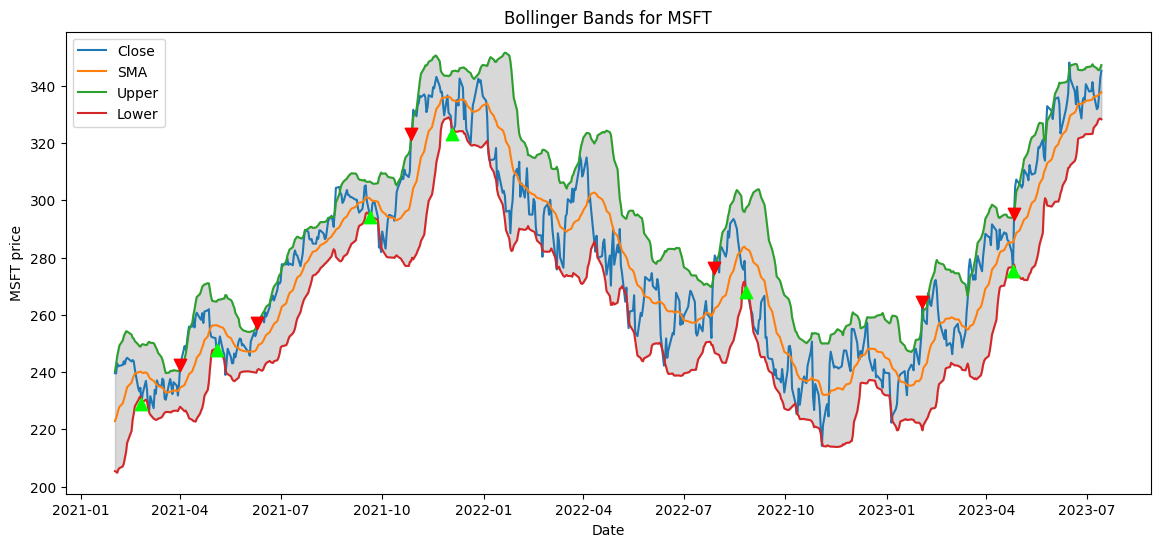

In [11]:
# Plot the Bollinger Bands and stock prices
plt.figure(figsize = (14, 6))
plt.plot(stock_df[['Close', 'SMA', 'Upper', 'Lower']])
plt.fill_between(stock_df.index, stock_df['Upper'], stock_df['Lower'], color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.xlabel("Date")
plt.ylabel(f"{stock_symbol} price")
plt.title(f"Bollinger Bands for {stock_symbol}")
plt.scatter(stock_df.iloc[buys].index, stock_df.iloc[buys]['Close'], marker='^', color='lime', s=80, zorder=10)
plt.scatter(stock_df.iloc[sells].index, stock_df.iloc[sells]['Close'], marker='v', color='r', s=80, zorder=10)
plt.show()

In [12]:
# Combine the buy and sell prices into a single dataframe
merged = pd.concat([stock_df.iloc[buys]['Close'], stock_df.iloc[sells]['Close']], axis=1)
merged.columns = ['Buys', 'Sells']

In [13]:
# Calculate total profit by subtracting buy price from sell price
merged['Total Profit'] = merged['Sells'].shift(-1) - merged['Buys']

In [14]:
# Calculate relative profit (percent) by dividing the difference by the buy price
merged['Relative Profit (%)'] = ((merged['Sells'].shift(-1) - merged['Buys']) /merged['Buys']) * 100

In [15]:
# Calculate cumulative returns
stock_df['Returns'] = stock_df['Close'].pct_change()
stock_df['Cumulative Returns'] = (1 + stock_df['Returns']).cumprod()
cumulative_returns = stock_df['Cumulative Returns'].iloc[-1]

C:\Users\cythe\AppData\Local\Temp\ipykernel_19908\3731188461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Returns'] = stock_df['Close'].pct_change()
C:\Users\cythe\AppData\Local\Temp\ipykernel_19908\3731188461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Cumulative Returns'] = (1 + stock_df['Returns']).cumprod()


In [16]:
# Print the buy and sell prices, total profit, and relative profit
print(merged)

                  Buys       Sells  Total Profit  Relative Profit (%)
Date                                                                 
2021-02-25  228.990005         NaN     13.360001             5.834316
2021-04-01         NaN  242.350006           NaN                  NaN
2021-05-04  247.789993         NaN      9.449997             3.813712
2021-06-10         NaN  257.239990           NaN                  NaN
2021-09-20  294.299988         NaN     28.870026             9.809727
2021-10-27         NaN  323.170013           NaN                  NaN
2021-12-03  323.010010         NaN    -46.600006           -14.426799
2022-07-28         NaN  276.410004           NaN                  NaN
2022-08-26  268.089996         NaN     -3.489990            -1.301798
2023-02-02         NaN  264.600006           NaN                  NaN
2023-04-25  275.420013         NaN     19.949982             7.243476
2023-04-26         NaN  295.369995           NaN                  NaN


In [17]:
# Print cumulative returns
print("Cumulative Returns (%):", cumulative_returns * 100)

Cumulative Returns (%): 144.06008722182543
